# Analysis and Visualisation - Customer Loans in Finance

## Setting up

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import seaborn as sns
from scipy.stats import normaltest

In [2]:
from datatransform import DataTransform
from dataframeinfo import DataFrameInfo
from dataframetransform import DataFrameTransform
from plotter import Plotter

In [3]:
# Load the data type and null count corrected csv as a pandas DataFrame

df = pd.read_csv('data_analysis_and_visualisation.csv', low_memory=False, index_col =0)


In [4]:
# Display all columns when called

pd.pandas.set_option('display.max_columns', None)

In [5]:
# Create instances of the class

datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

In [6]:
# Convert date columns from strings to datetime

df = datatransform.convert_to_period('issue_date', 'earliest_credit_line', 'last_payment_date', 'next_payment_date', 'last_credit_pull_date')

In [7]:
# Create a column with the total expected revenue return by mulitplying the monthly instalments including interest by the loan term

df['expected_rev_return'] = df['instalment']*df['term']

In [8]:
df.head()

,id,member_id,loan_amount,funded_amount,funded_amount_inv,term,int_rate,instalment,grade,sub_grade,employment_length,home_ownership,annual_inc,verification_status,issue_date,loan_status,payment_plan,purpose,dti,delinq_2yrs,earliest_credit_line,inq_last_6mths,open_accounts,total_accounts,out_prncp,out_prncp_inv,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_date,last_payment_amount,next_payment_date,last_credit_pull_date,collections_12_mths_ex_med,policy_code,application_type,expected_rev_return
0,38676116,41461848,8000,8000.0,8000.0,36,7.49,248.82,A,A4,5 years,MORTGAGE,46000.0,Not Verified,2021-01-01,Current,n,credit_card,19.54,2,1987-10-01,1,12,27,5529.70,5529.70,2982.51,2982.51,2470.30,512.21,0.0,0.0,0.0,2022-01-01,248.82,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL,8957.52
1,38656203,41440010,13200,13200.0,13200.0,36,6.99,407.52,A,A3,9 years,RENT,50000.0,Not Verified,2021-01-01,Current,n,credit_card,24.20,0,2001-09-01,0,15,31,9102.83,9102.83,4885.11,4885.11,4097.17,787.94,0.0,0.0,0.0,2022-01-01,407.52,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL,14670.72
2,38656154,41439961,16000,16000.0,16000.0,36,7.49,497.63,A,A4,8 years,MORTGAGE,73913.0,Verified,2021-01-01,Fully Paid,n,credit_card,16.92,0,1998-09-01,0,7,18,0.00,0.00,16824.54,16824.54,16000.00,824.54,0.0,0.0,0.0,2021-10-01,12850.16,NaT,2021-10-01,0.0,1,INDIVIDUAL,17914.68
3,38656128,41439934,15000,15000.0,15000.0,36,14.31,514.93,C,C4,1 year,RENT,42000.0,Verified,2021-01-01,Fully Paid,n,debt_consolidation,35.52,0,2008-06-01,0,6,13,0.00,0.00,15947.47,15947.47,15000.00,947.47,0.0,0.0,0.0,2021-06-01,13899.67,NaT,2021-06-01,0.0,1,INDIVIDUAL,18537.48
4,38656121,41439927,15000,15000.0,15000.0,36,6.03,456.54,A,A1,10+ years,MORTGAGE,145000.0,Verified,2021-01-01,Current,n,debt_consolidation,3.33,0,2002-04-01,1,23,50,10297.47,10297.47,5473.46,5473.46,4702.53,770.93,0.0,0.0,0.0,2022-01-01,456.54,2022-02-01,2022-01-01,0.0,1,INDIVIDUAL,16435.44


In [9]:
# Update instances of the class

datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

## Current State of the Loans

The following sections summarise currently the current state of the loans. Firstly, the percentage of loans that are currently recovered against the investor funding and total funded amount is calculated and displayed.

In [10]:
# Calculate the percentage of total_payment against funded_amount and funded_amount_inv

total_payment_total, funded_amount_total, percentage_total = datainfo.col_percentage('total_payment', 'funded_amount')
total_payment_total, funded_amount_inv_total, percentage_inv = datainfo.col_percentage('total_payment', 'funded_amount_inv')
print(f' Percentage of loans recovered against the total funded amount: {percentage_total}%')
print(f' Percentage of loans recovered against the investor funded amount: {percentage_inv}%')

 Percentage of loans recovered against the total funded amount: 91.34%
 Percentage of loans recovered against the investor funded amount: 93.29%


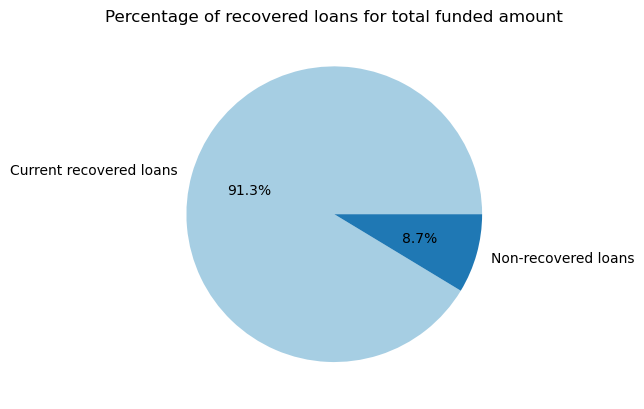

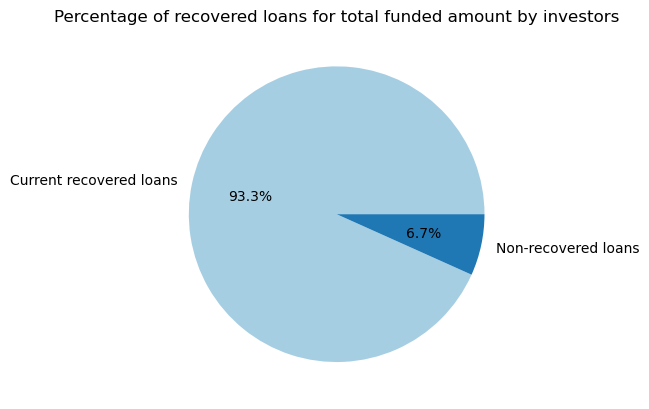

In [11]:
# Visualise the percentages in a pie chart

non_recovered_funded_amount = 100 - percentage_total
non_recovered_funded_amount_inv = 100 - percentage_inv
plotter.two_variable_pie_chart(percentage_total, non_recovered_funded_amount, 'Current recovered loans', 'Non-recovered loans', 'Percentage of recovered loans for total funded amount')
plotter.two_variable_pie_chart(percentage_inv, non_recovered_funded_amount_inv, 'Current recovered loans', 'Non-recovered loans', 'Percentage of recovered loans for total funded amount by investors')

From the graph it is clear that ~90% of loans have been recovered for both investor funding and total funding sources. It is useful to calculate what percentage of loans are recovered against total funding in 6 months time.

To calculate the expected loan payments over the next six months, the monthly installment can be multiplied by the number of months left of each loan up to six months for active accounts. This excludes accounts which are fully paid off, charged off or do not meet the credit policy. Instead, the projection will include the status of loans which are current, late, and in default. The loss projection from late and default borrowers will be calculated later on.

In [12]:
# Find the different types of loan status

df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [13]:
# Create list of active account types from loan_status categories to include in the calculation

loan_status_outstanding_col = ['Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default']

In [14]:
# Find percentage of active accounts instalments over the next 6 months against the total funded amount and expected revenue retun

percentage_total_rev_all_accounts, percentage_funded_amount_all_accounts = datainfo.projected_collections_current(loan_status_outstanding_col)

The percentage of projected revenue over the next six months of the total funded amount for all accounts is 7.43%. 
This represents 5.75% of the total expected amount from all accounts including interest.


Alongside the total payments so far for all accounts, the recovery funds in six months would total £707846041.06.


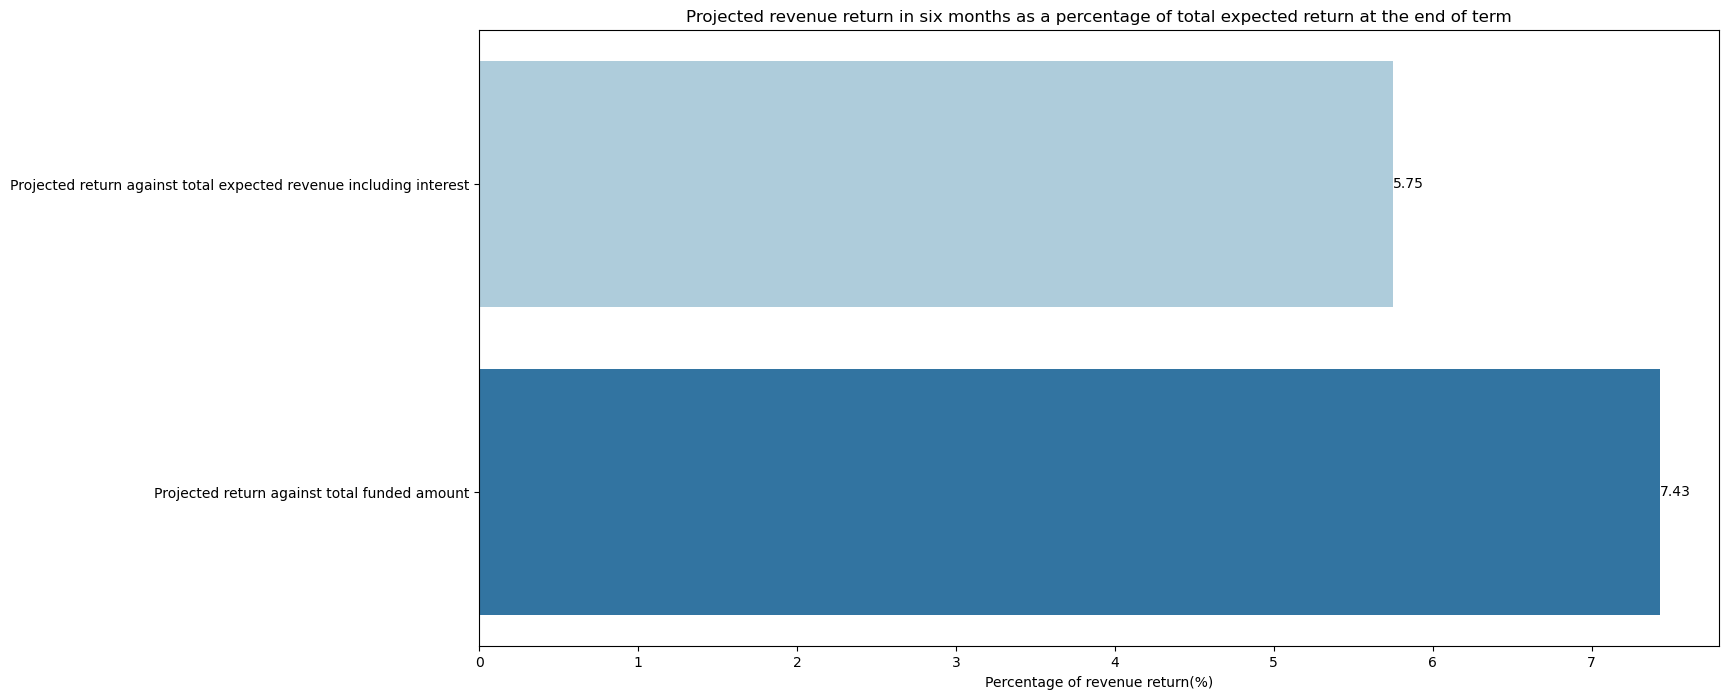

In [15]:
# Visualise percentage of revenue return in six months as a percentage of total expected return at end of term

plotter.bar_chart([percentage_total_rev_all_accounts, percentage_funded_amount_all_accounts],['Projected return against total expected revenue including interest', 'Projected return against total funded amount'], 'Projected revenue return in six months as a percentage of total expected return at the end of term', 'Percentage of revenue return(%)')

## Calculating Loss

Charged off loans represent a loss to the company, so quantifying the percentage of loans which are charged off and the amount that was contributed to these loans before being charged off represents important information. The percentage of loans with 'Charged Off' status is found below:

In [16]:
# Create list of unique categories in loan status column

loan_status_categories = ['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off']

In [17]:
# Create a list of the percentage and count of each category in the column

category_percentage_list, category_count_list = datainfo.percentage_of_all_category('loan_status', loan_status_categories)

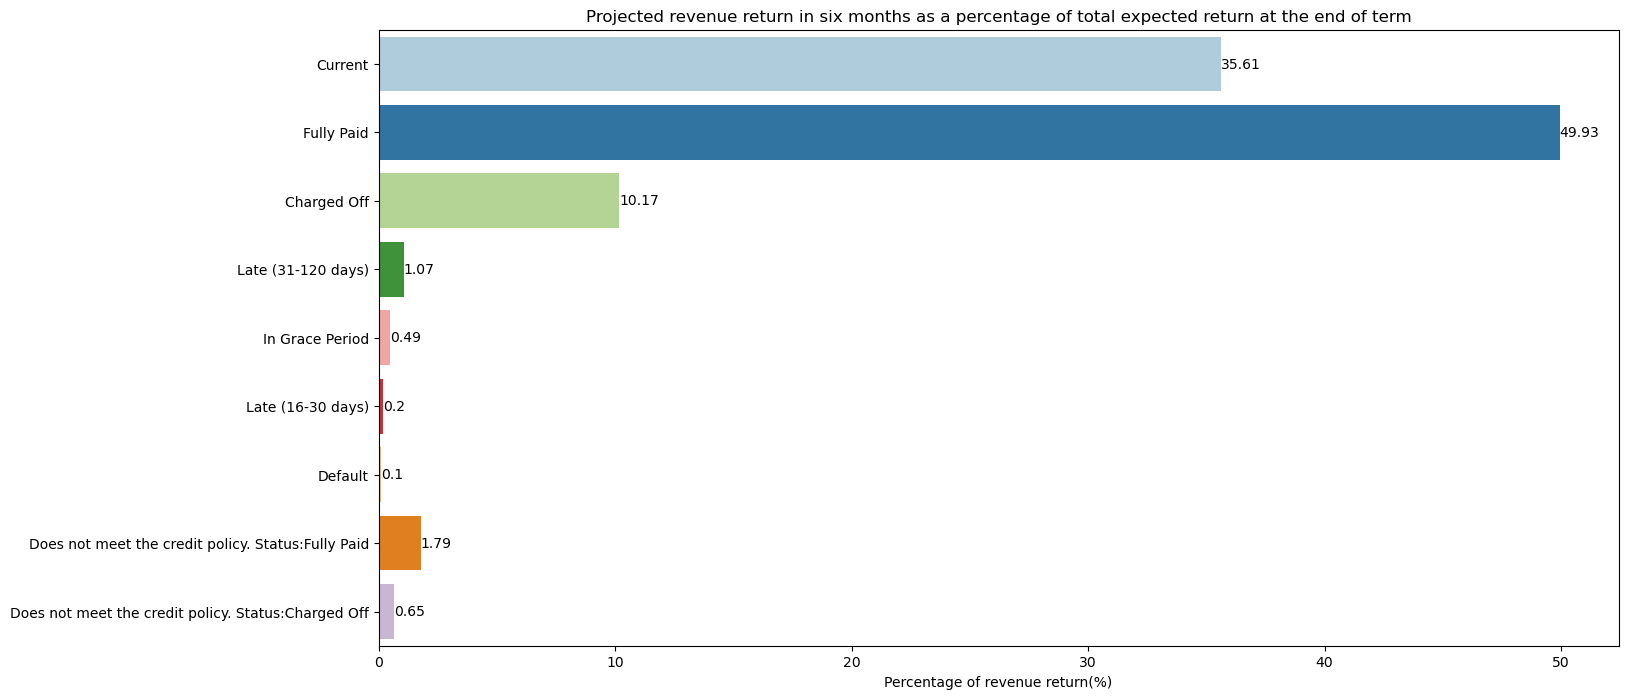

In [18]:
# Visualise percentage of each category in loan status column

plotter.bar_chart(category_percentage_list, loan_status_categories, 'Projected revenue return in six months as a percentage of total expected return at the end of term', 'Percentage of revenue return(%)')

In [19]:
# Find percentage of loans with status 'Charged Off'

charged_off_percentage, total_charged_off, total_funded_amount = datainfo.percentage_of_charged_off()

Percentage of loans which are charged off: 10.17%
Total amount paid towards loans which are now charged off: £37282284.32
The percentage of charged off loans that was recovered to the total funded amount for these loans is is 49.91%.
This represents 36.85% of the total expected amount for charged off loans including interest


## Calculating Projected Loss

If the accounts had not been identified as unreliable and not charged off, they would represent a financial liability to the company assuming that no further payments would be made. The projected loss in revenue these loans would have generated for the company if they had finished their term can be calculatedand visualised as follows:

The projected loss from charged off loans would be: £67159827.35
This would represent 9.37% of the total funded amount and 7.25% of the total expected revenue including interest
This also represents 66.38% of the total expected revenue for charged off loans


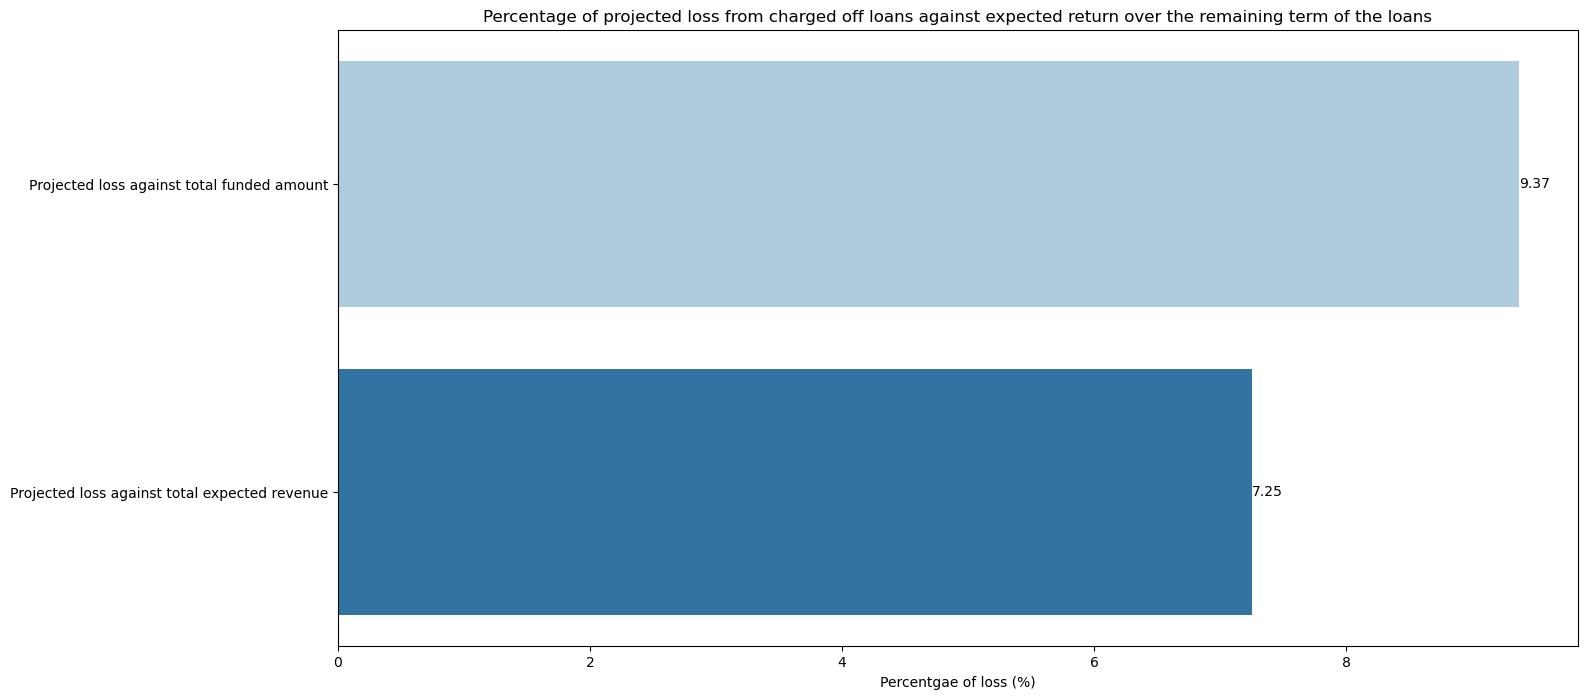

In [20]:
# Calculate total projected loss from charged off loans at the end of loan term

charged_off_df = df.copy()
charged_off_df = charged_off_df.loc[charged_off_df['loan_status'] == 'Charged Off']
percentage_loss_funded_amount, percentage_loss_exp_rev, percentage_loss_exp_rev_cat = datainfo.projected_loss_from_category('charged off', charged_off_df)

plotter.bar_chart([percentage_loss_funded_amount, percentage_loss_exp_rev], ['Projected loss against total funded amount', 'Projected loss against total expected revenue'], 'Percentage of projected loss from charged off loans against expected return over the remaining term of the loans', 'Percentgae of loss (%)')

## Possible Loss

There are customers who are currently behind with their loan payments. This subset of customers represent a risk to company revenue. It is useful to find out more information about which acocunts may pose a risk.

Accounts which will be considered risky are those which are late, with the loan status 'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'.


If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [21]:
# Create a list of categories in loan status column

open_loan_status_categories = ['Current', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default']

risky_category_list = ['Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)']

In [22]:
# Calculate the number of loans that are currently open and the percentage 

category_percentage_list, category_count_list = datainfo.percentage_of_open_category('loan_status', open_loan_status_categories)

Percentage of loan status Current: 95.05%
Number of loans with loan status Current: 19267 

Percentage of loan status Late (31-120 days): 2.86%
Number of loans with loan status Late (31-120 days): 580 

Percentage of loan status In Grace Period: 1.31%
Number of loans with loan status In Grace Period: 265 

Percentage of loan status Late (16-30 days): 0.52%
Number of loans with loan status Late (16-30 days): 106 

Percentage of loan status Default: 0.26%
Number of loans with loan status Default: 52 



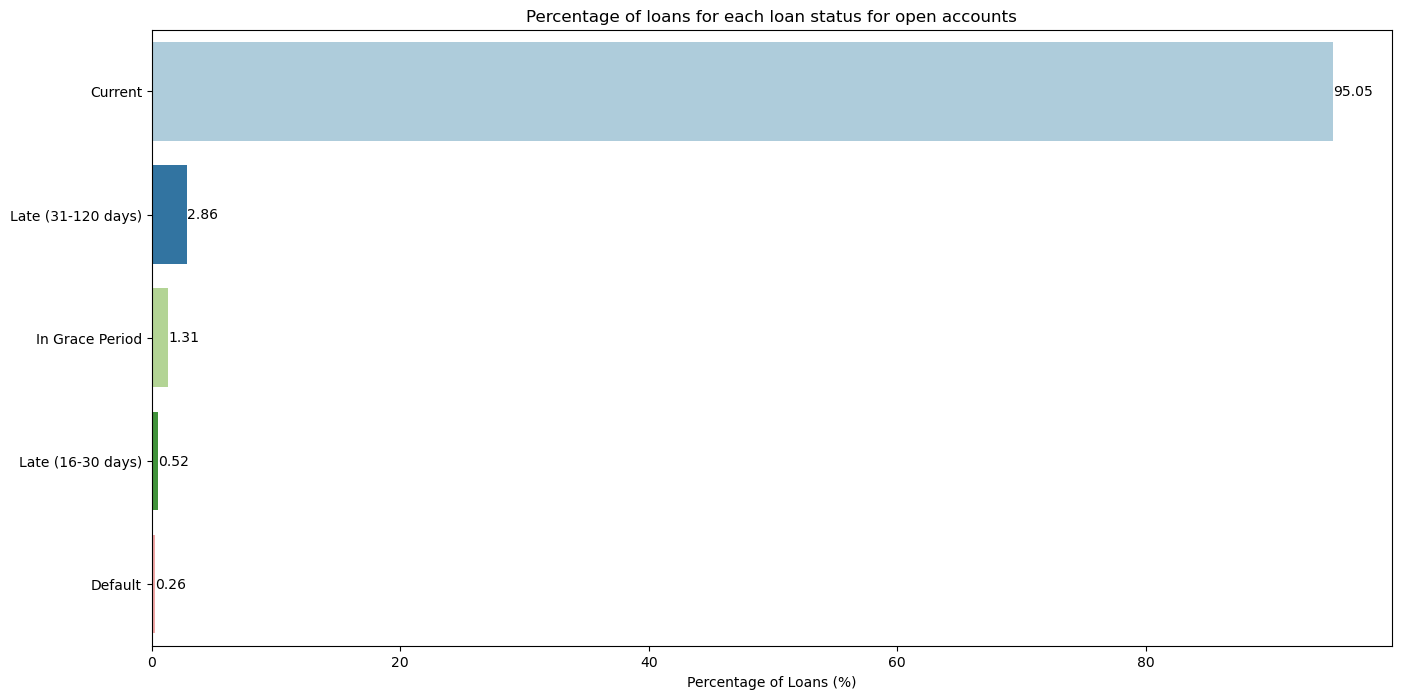

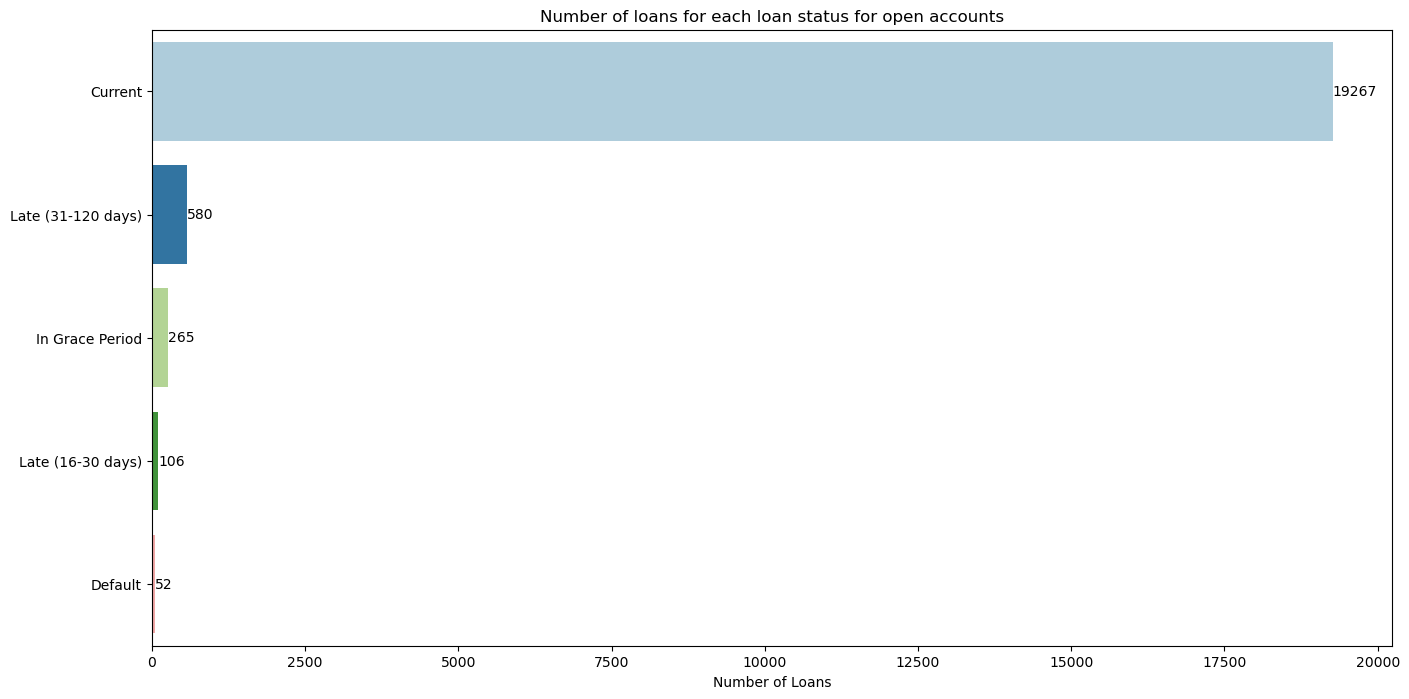

In [23]:
# Plot a bar chart of the previous results

plotter.bar_chart(category_percentage_list, open_loan_status_categories, 'Percentage of loans for each loan status for open accounts', 'Percentage of Loans (%)')
plotter.bar_chart(category_count_list, open_loan_status_categories, 'Number of loans for each loan status for open accounts', 'Number of Loans')

From the bar chart it can be calculated that 951 loans are classed as risky and these risky loans represent 4.7% of all current loans. If these loans were continued, future losses may occur. It is possible to calculate how much revenue would be lost if these risky loans were charged off. The following calculations returns the revenue loss if the risky loans were charged off now , and the projected revenue loss to the end of term for each risky loan.

What is the projected loss of these loans if the customer were to finish the full loans term?

In [24]:
# Returns the amount paid to risky loans so far and the percentage of the funded amount this represents for the risky loans

datainfo.risky_loans_total_payment(risky_category_list)

Total amount paid so far towards loans which are considered risky and would represent a loss if charged off is: £10141112.0
This represents 70.55% of the funded amount for these risky loans and 51.47% of the total expected revenue.


In [25]:
# Returns the total amount lost from risky loans projected to the end of each loan term

percentage_loss_exp_risky, percentage_loss_exp_risky_open, projected_loss_risky_loans = datainfo.projected_possible_loss('risky', risky_category_list, open_loan_status_categories)

The projected loss from risky loans to the end of term would be: £9387657.66
This represents 65.31% of the total funded amount and 47.64% of total expected return of risky loans
This also represents 3.1% of the total funded amount and 2.37% of total expected return of all open accounts


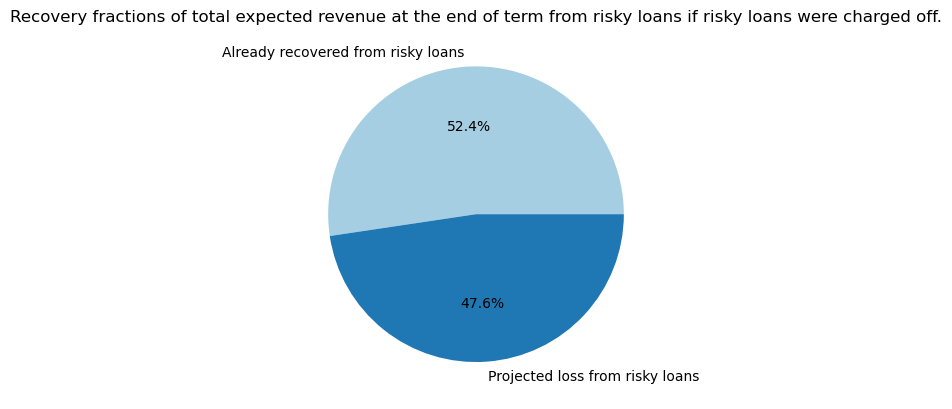

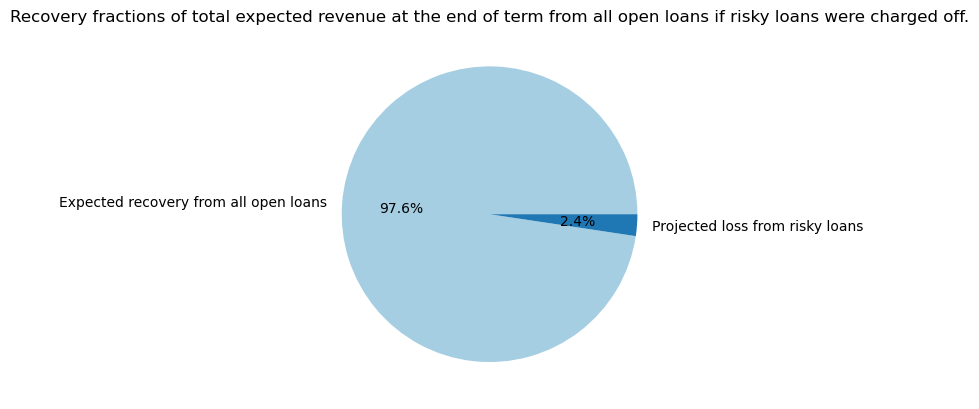

In [26]:
recovered_risky_loans = 100 - percentage_loss_exp_risky
exp_recovered_all_loans = 100 - percentage_loss_exp_risky_open

plotter.two_variable_pie_chart(recovered_risky_loans, percentage_loss_exp_risky, 'Already recovered from risky loans', 'Projected loss from risky loans', 'Recovery fractions of total expected revenue at the end of term from risky loans if risky loans were charged off.')
plotter.two_variable_pie_chart(exp_recovered_all_loans, percentage_loss_exp_risky_open, 'Expected recovery from all open loans', 'Projected loss from risky loans', 'Recovery fractions of total expected revenue at the end of term from all open loans if risky loans were charged off.')

From the above calculations, payments made so far to risky loans stands at just over £10 million, which is 71% of the total funded amount for those loans. If those loans were charged off now, the projected revenue loss would be ~£9 million, a substantial figure, which represents 65% of the total funded amount. Additionally, this loss represents 3% of the total funded amount from all open accounts.

If customers late on payments converted to Charged Off, what percentage of total expected revenue do these customers and the customers who have already defaulted on their loan represent?

In [27]:
default_list = ['Default']
percentage_loss_exp_default, percentage_loss_exp_default_open, projected_loss_default_loans = datainfo.projected_possible_loss('default', default_list, open_loan_status_categories)

The projected loss from default loans to the end of term would be: £536215.14
This represents 70.9% of the total funded amount and 51.48% of total expected return of default loans
This also represents 0.18% of the total funded amount and 0.14% of total expected return of all open accounts


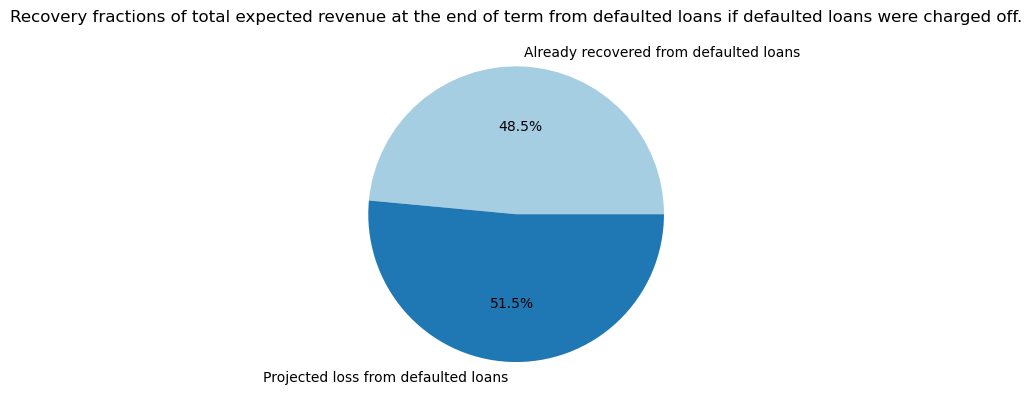

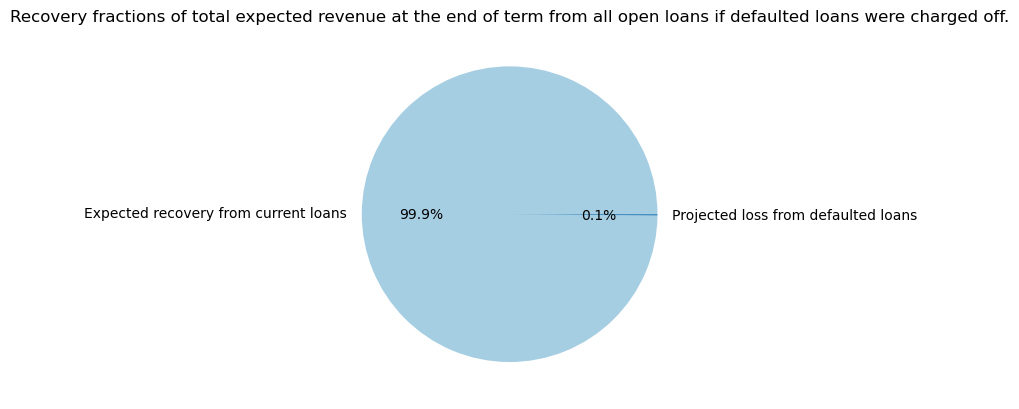

In [28]:
recovered_default = 100 - percentage_loss_exp_default
exp_recovered = 100 - percentage_loss_exp_default_open

plotter.two_variable_pie_chart(recovered_default, percentage_loss_exp_default, 'Already recovered from defaulted loans', 'Projected loss from defaulted loans', 'Recovery fractions of total expected revenue at the end of term from defaulted loans if defaulted loans were charged off.')
plotter.two_variable_pie_chart(exp_recovered, percentage_loss_exp_default_open, 'Expected recovery from current loans', 'Projected loss from defaulted loans', 'Recovery fractions of total expected revenue at the end of term from all open loans if defaulted loans were charged off.')

In [29]:
projected_loss_risky_default = projected_loss_default_loans + projected_loss_risky_loans
print(f'Projected total revenue loss from defaulted and risky loans at the end of term is: £{projected_loss_risky_default}')


Projected total revenue loss from defaulted and risky loans at the end of term is: £9923872.8


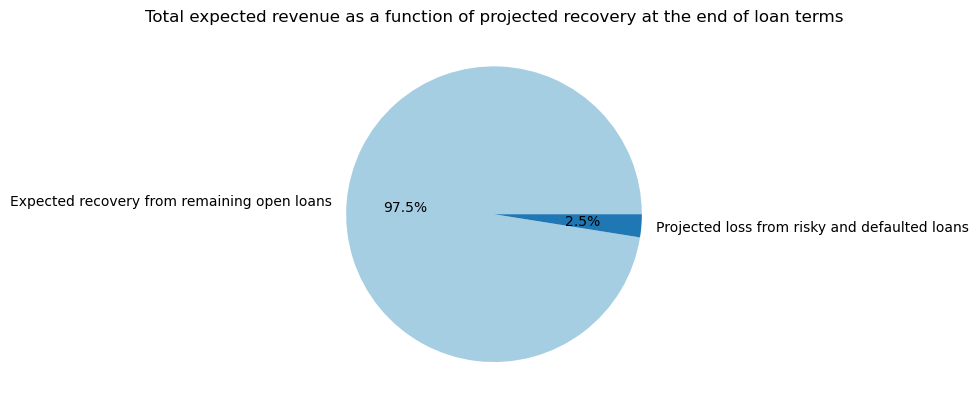

In [30]:
exp_rev = df['expected_rev_return'].sum()
percentage_loss_risky_default = percentage_loss_exp_default_open + percentage_loss_exp_risky_open
percentage_exp_recovered = 100 - percentage_loss_risky_default
plotter.two_variable_pie_chart(percentage_exp_recovered,percentage_loss_risky_default , 'Expected recovery from remaining open loans', 'Projected loss from risky and defaulted loans', 'Total expected revenue as a function of projected recovery at the end of loan terms')

Here it is clear that the combination of risky and defaulted loans poses a projected revenue loss of almost £10 million, which represents 2.5% of the total expected revenue at the end of loan term. Therefore these loans represent a significant risk, with late loans representing 2.4% of the projected loss.

## Indicators of loss

The next section will aim to identify possible indicators that a customer will not be able to pay the loan. The factors to be considered as an identifier of loss will be: loan grade, employment length, verification status, purpose of the loan, home ownership, loan term, annual income, loan amount, interest rate, instalment and dti.

It will be established whether these is a relationship between these variables and accounts which have a late, charged off or defaulted loan status.


'grade'
'term'
'employment_length'
'home_ownership'
'purpose'
Continuous Columns:

'annual_inc'
'int_rate'
'loan_amount'
'instalment'
'dti'

### Grade

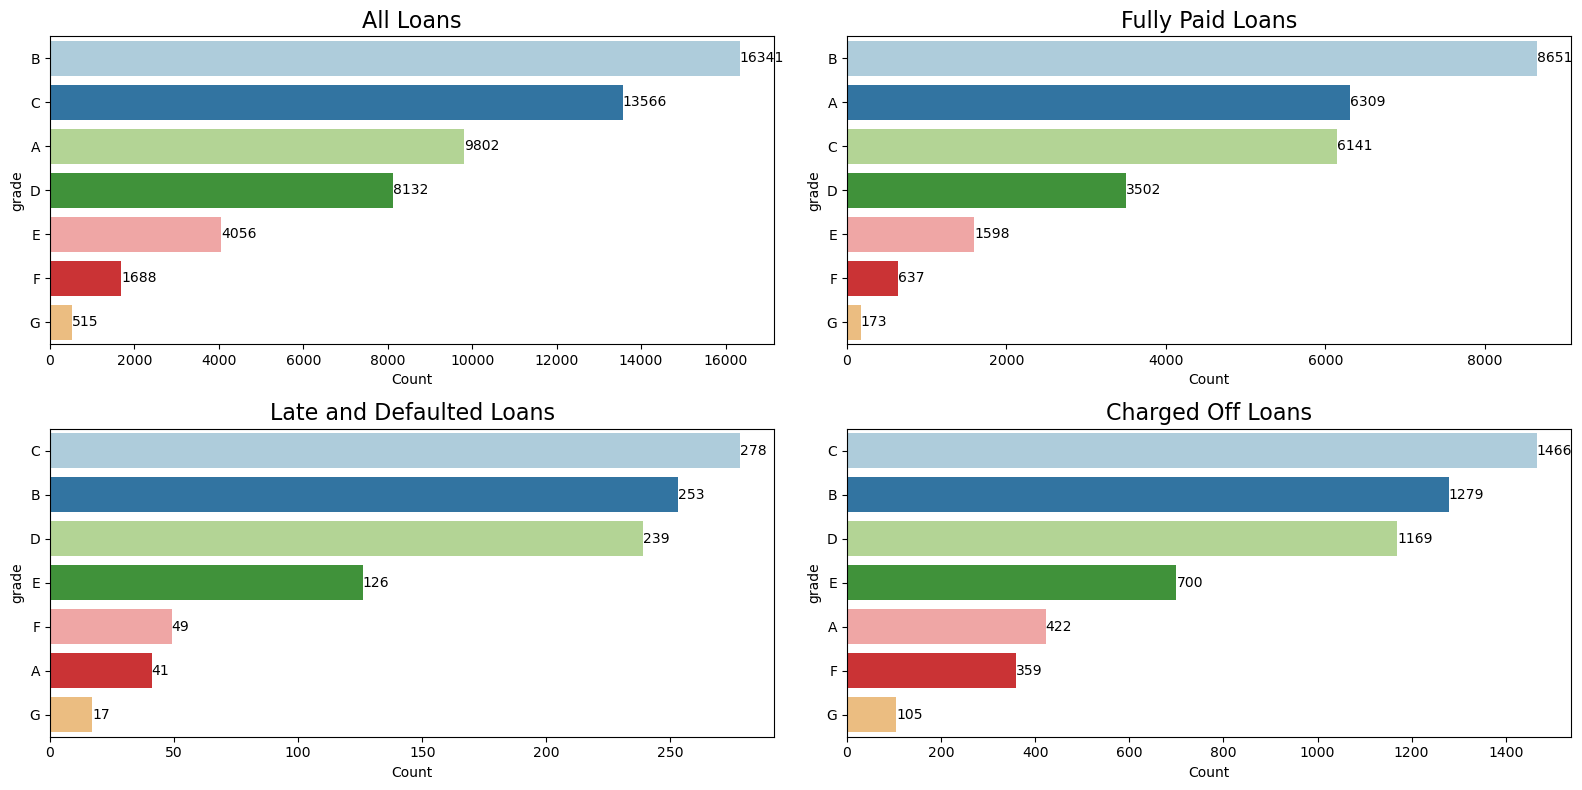

In [31]:
# Visualise loan grades as a function of loan status

plotter.risk_identifier_categorical('grade')

Approximately a third of all loans were rated 'B'. 

For fully paid loans, 32% were rated 'B' followed by 23% rated 'A', the highest loan rating.

For late and defaulted loans, the most common rating was 'C' at 28%, followed by 25% at 'B'. Only 4% of these loans were rated at 'A'.

For charged off loans, the most common rating was 'C' at 27%, followed by 23% at 'B'. Only 8% of these loans were rated at 'A'.

It appears that a lower rating can provide an indication of a future charged off status of loan or if aan acocunt may fall behind timely payments of the loan instalments. And conversely, 'A' rated loans are more likely to reach end of term fully paid.

---

### Employment length

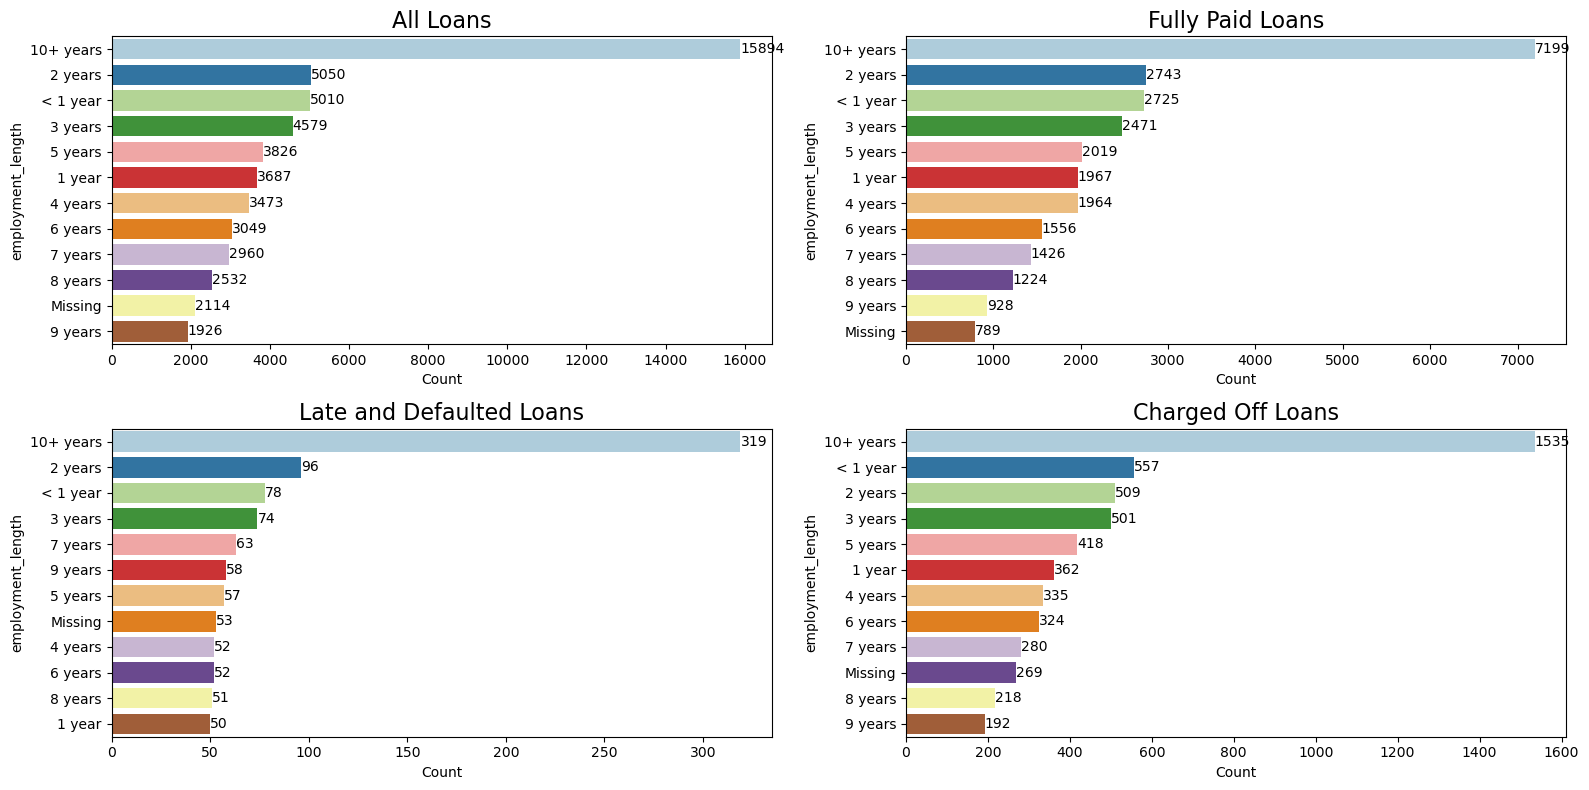

In [32]:
# Visualise employment length as a function of loan status

plotter.risk_identifier_categorical('employment_length')

For every status of loan, the most common employment length is 10+ years, followed by 1-2 years. Not much information on loan risk indicators can be gained from this variable.

--- 

### Verification Status

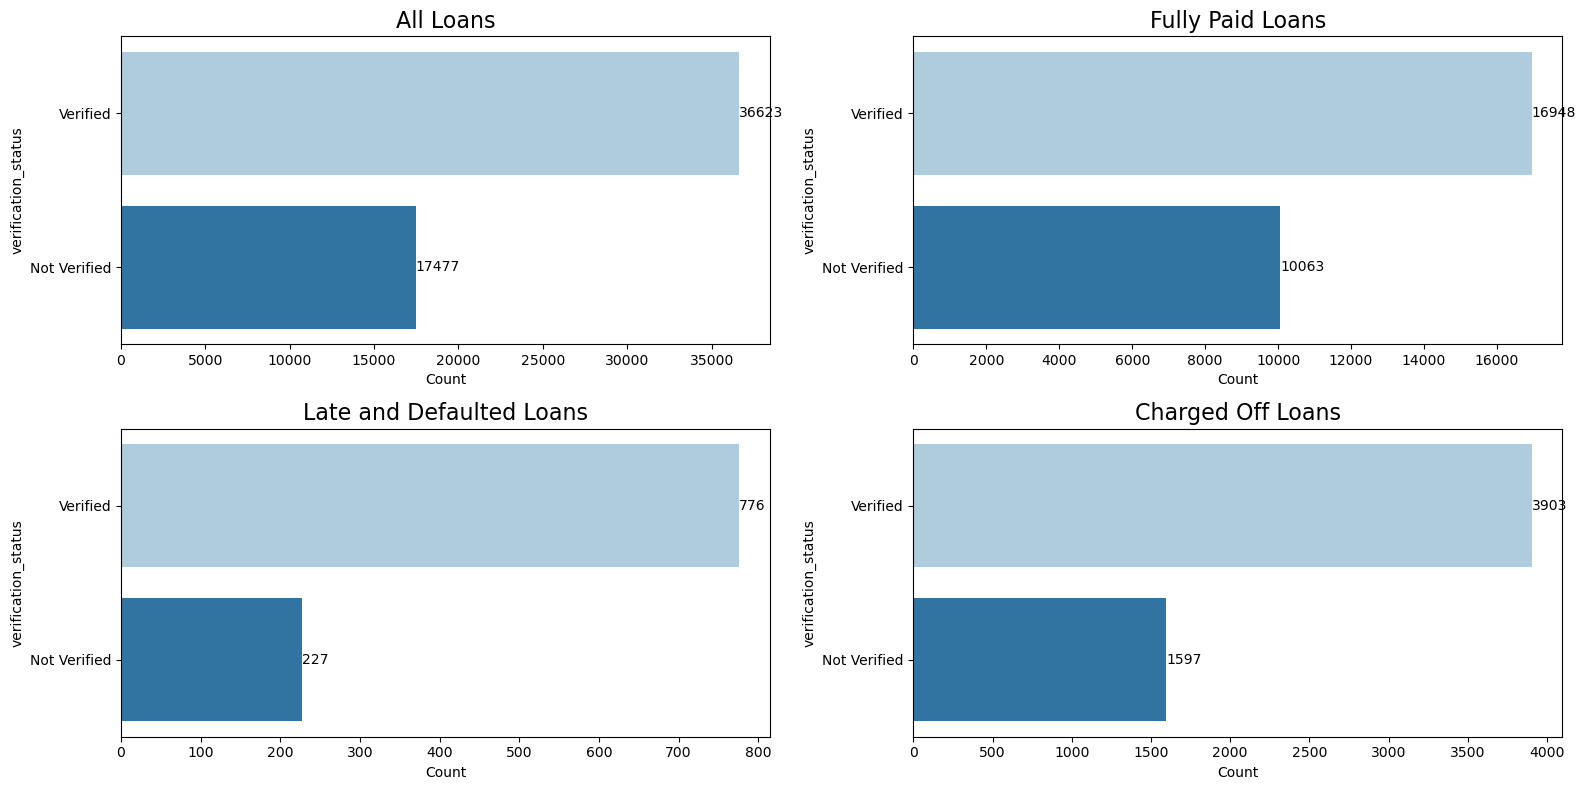

In [33]:
# Visualise verification status as a function of loan status

plotter.risk_identifier_categorical('verification_status')

The majority of all loans are 'verified', with 68% of all loans, 62% of full paid loans, 77% of 'risky' late and defaulted loans and 71% of charged off loans being 'verified'. Therefore, verification status does not appear to be a predictor for risky loans, as it may be expected that a higher unverfified percentage of loans woul indicate higher default rates, but that is not observed, in fact the opposite.

---

### Purpose of the loan

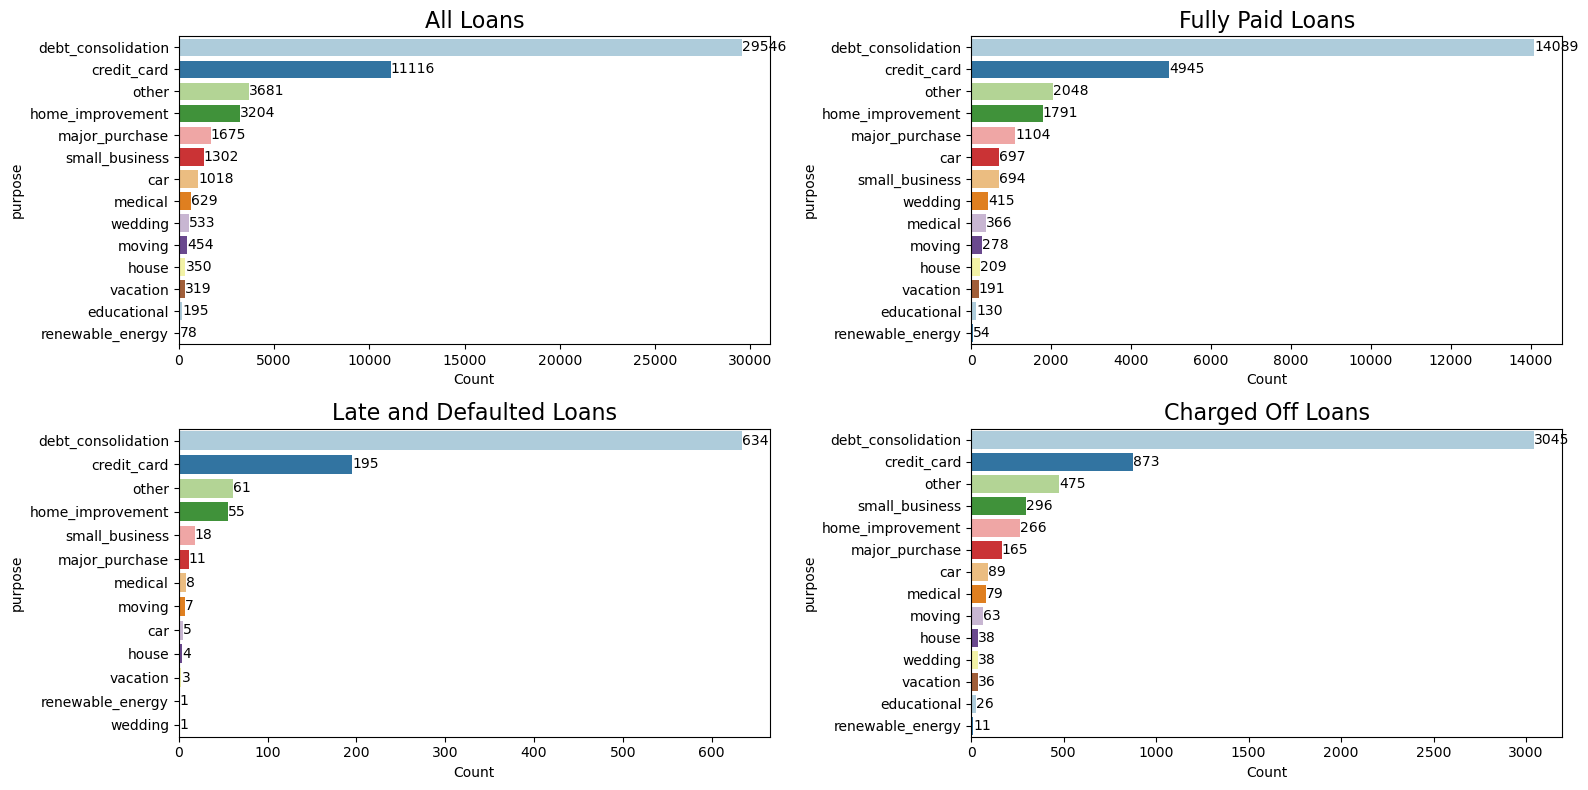

In [34]:
# Visualise loan purpose as a function of loan status

plotter.risk_identifier_categorical('purpose')

The most common reason for taking out a loan is 'debt consolidation', followed by 'credit card' and 'other'. This variable does not appear to be a predictor of default.

---

### Home ownership

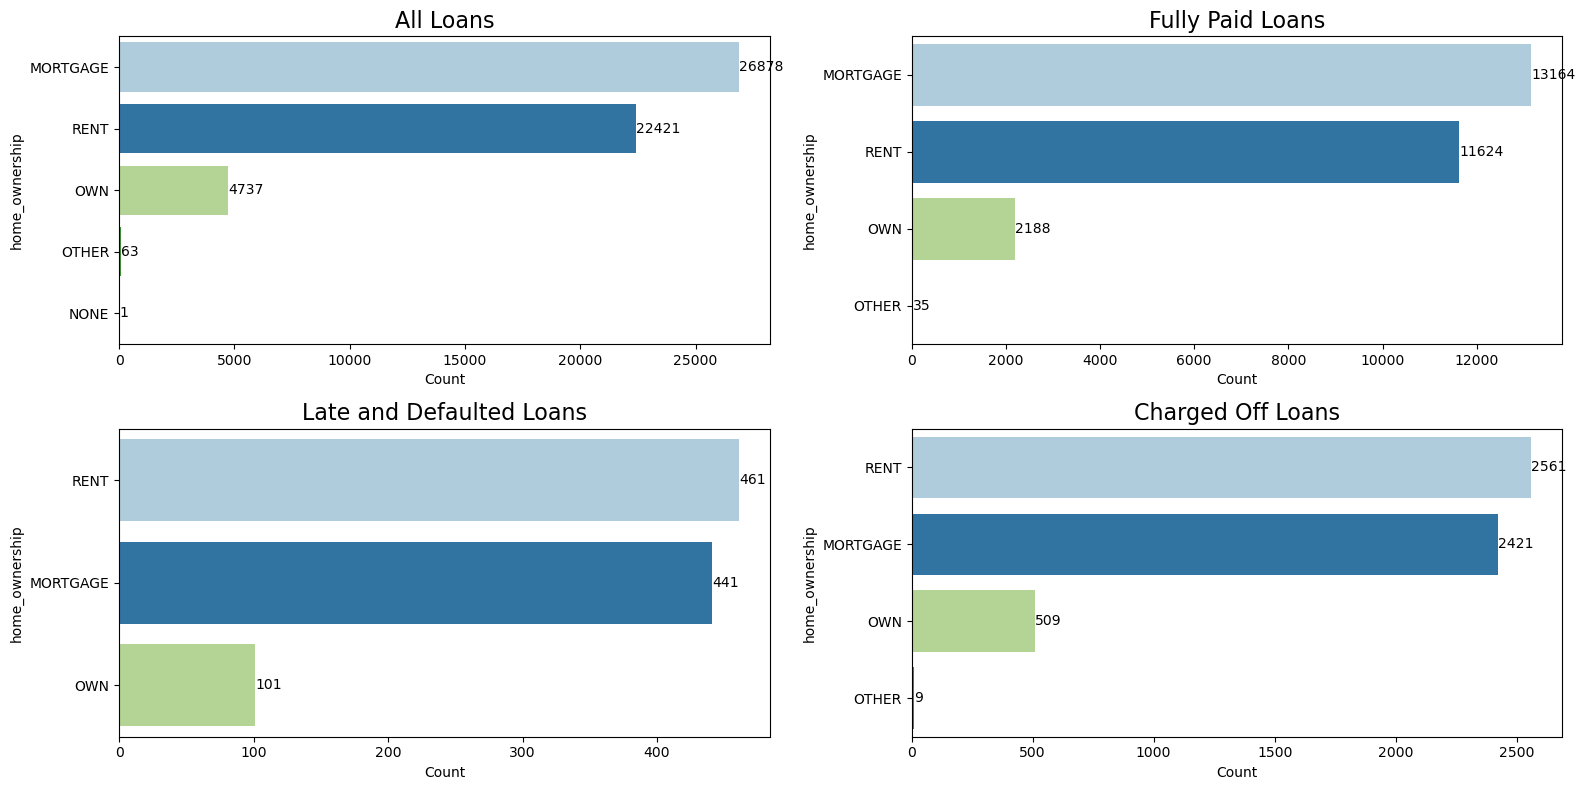

In [35]:
# Visualise home ownership as a function of loan status

plotter.risk_identifier_categorical('home_ownership')

The majority of all accounts possess a mortgage, representing 50% of all loans.

Similarly for full paid loans, 49% of these loans possess a mortgage, followed by 43% who rent.

A major divergence is seen for risky and charged off loans, with renting being the most populous form of housing.

For late and defaulted loans, renters represent 46% of these loans followed by 44% with a mortgage.

For charged off loans, 47% of accounts are renters followed by 44% with a mortgage.

Therefore, home ownership is a potential indicator of a loan being charged off, with a high correlation between renting and late/defaulted and charged off loans. The similarity of late/defaulted loans and charged off loans in this variable suggests that late/defaulted loans should be closely monitored and placed on a payment plan to avoid charging off of the loans.

---

### Loan term

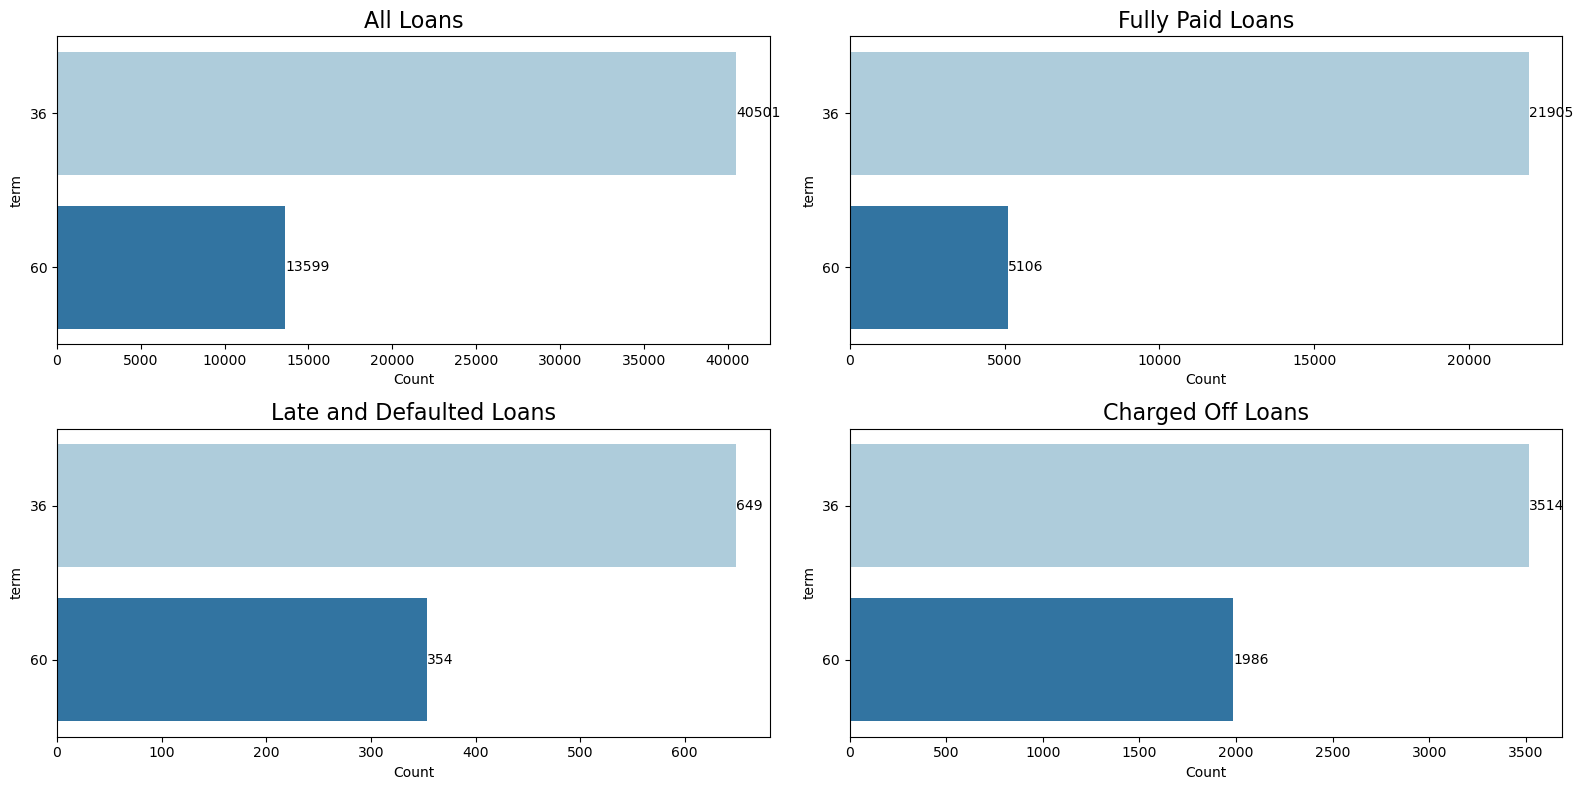

In [36]:
# Visualise loan term as a function of loan status, convert 'term' column back to a string

df['term'] = df['term'].astype(str)
plotter.risk_identifier_categorical('term')

The majority of all loans are provided with a 36 month term. Higher percentages of late\defaulted loans (35%) and charged off (37%) are issued at 60 months compared to fully paid loans (19%). This information alone is not enough to deduce a correlation, as the loan amount spread over the term provides the instalments, and each 36 and 60 month term will have different instalment amounts.

---

### Annual Income

In [37]:
# Remove outliers from numerical columns to consider

col_with_outliers = ['annual_inc', 'int_rate', 'instalment', 'dti', 'loan_amount']
for col_name in col_with_outliers:
    df = dftransform.drop_outliers(col_name, 3)

In [38]:
# Update class instance with modified dataframe

datatransform = DataTransform(df)
datainfo = DataFrameInfo(df)
dftransform = DataFrameTransform(df)
plotter = Plotter(df)

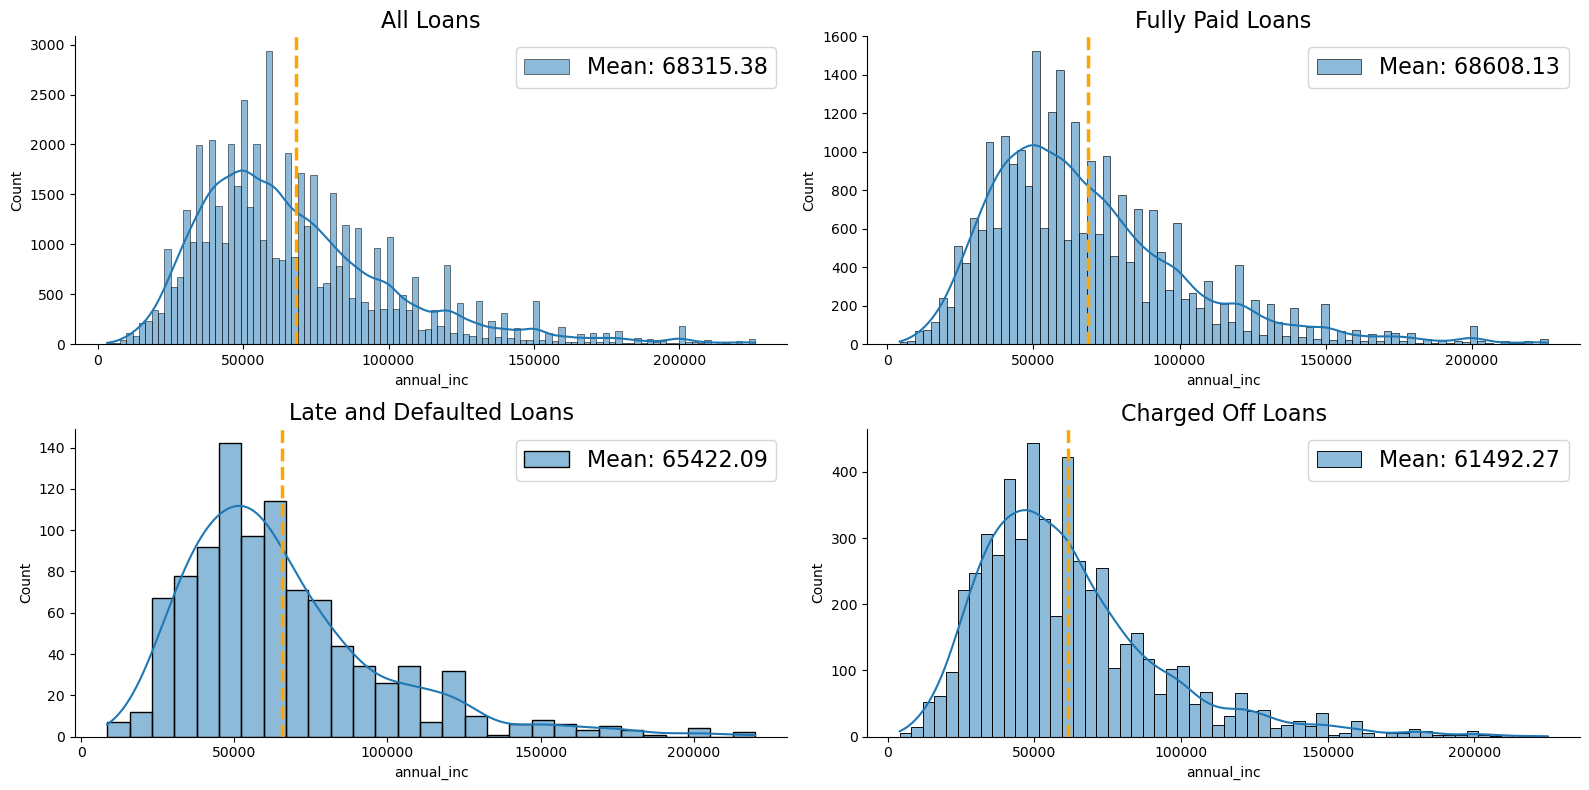

In [39]:
plotter.risk_identifier_numerical('annual_inc')

The average income is similar for all loans, whether fully paid or charged off, with a mean of ~£60,000 considering the range of ~£20,000-150,000. However, the mean income does slightly decrease when correlated with riskier and charged off loans, highlighting the potential indication of risk.

---

### Loan Amount

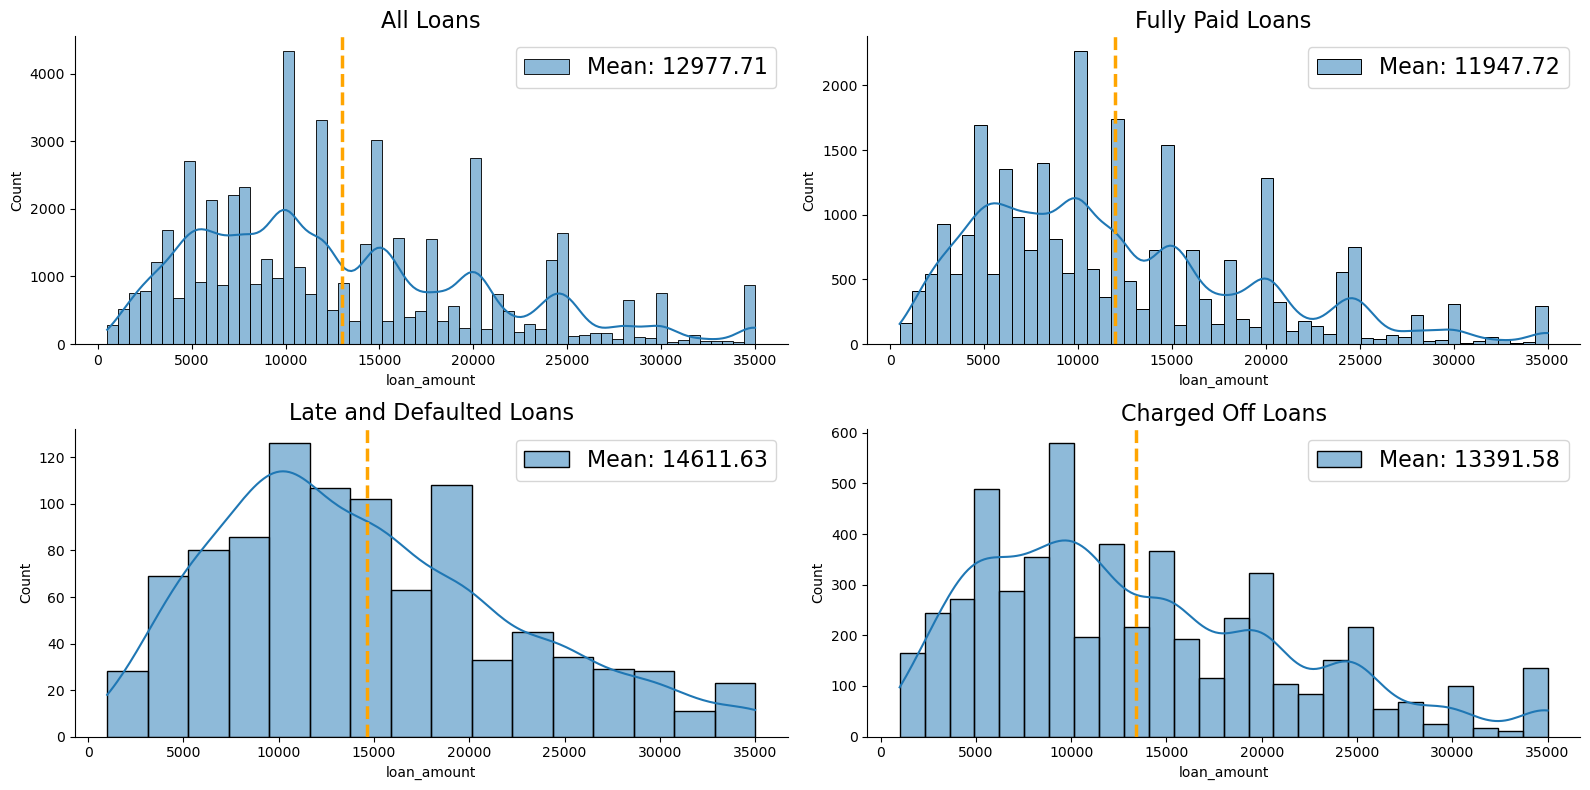

In [40]:
plotter.risk_identifier_numerical('loan_amount')

The mean loan amount is highest for late/defaulted, followed by charged off loans when compared to fully paid loans. Both risky and charged off loans have higher mean loan amounts that the mean of all loans considered, suggesting a higher loan amount can be monitored as a risk indicator.

---

### Interest Rate

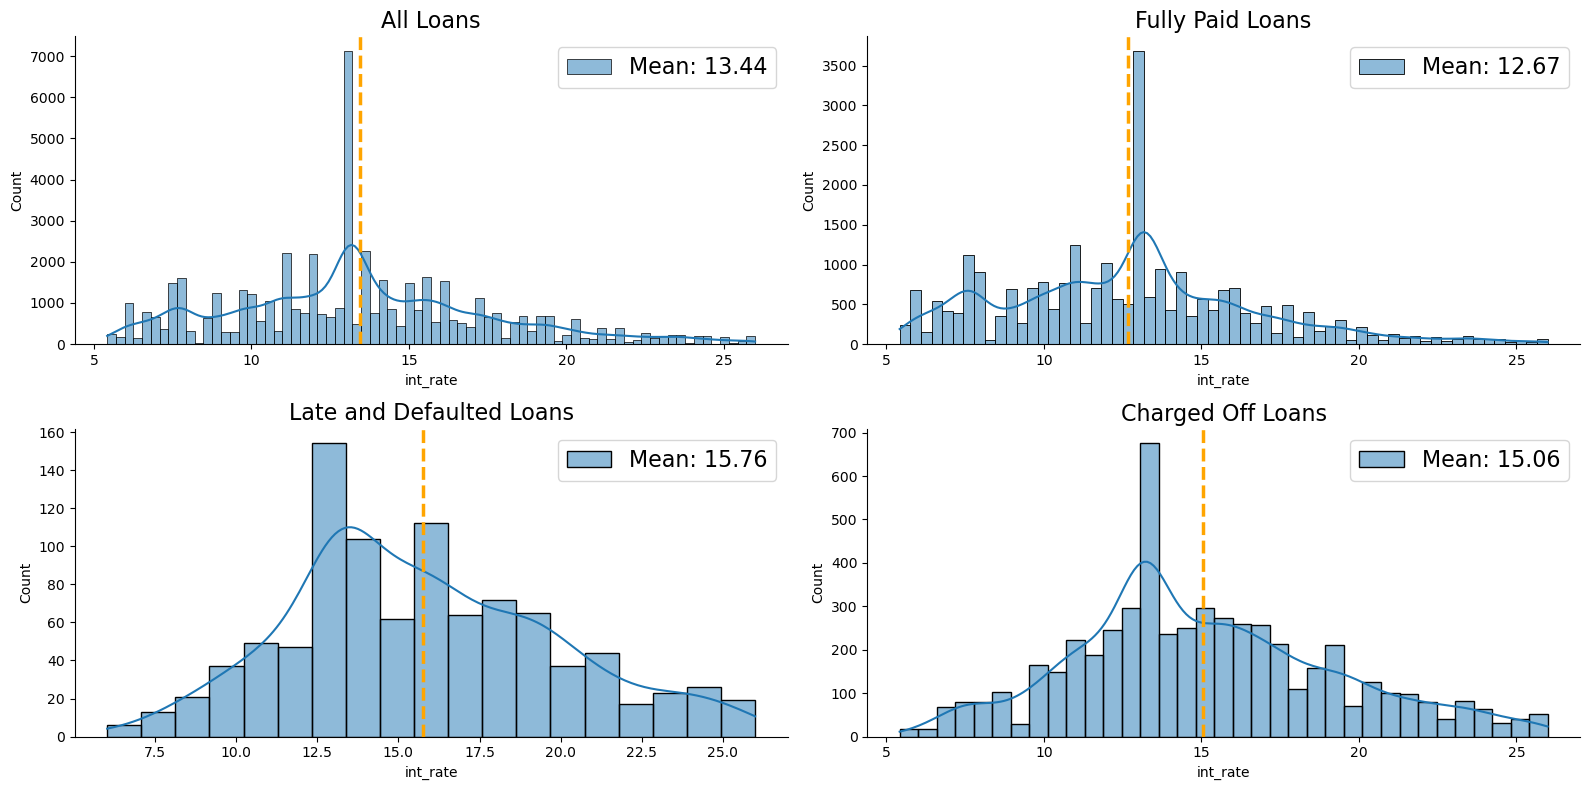

In [41]:
plotter.risk_identifier_numerical('int_rate')

A significant difference in interest rate is observed for risky and charged off loans compared to fully paid. Late/defaulted loan interest rates are 24% higher than fully paid loans, whilst charged off loans are 18% higher than fully paid. This demonstrates a strong indication that higher interests rates should be monitored as an indication of risk.

---

### Instalment 

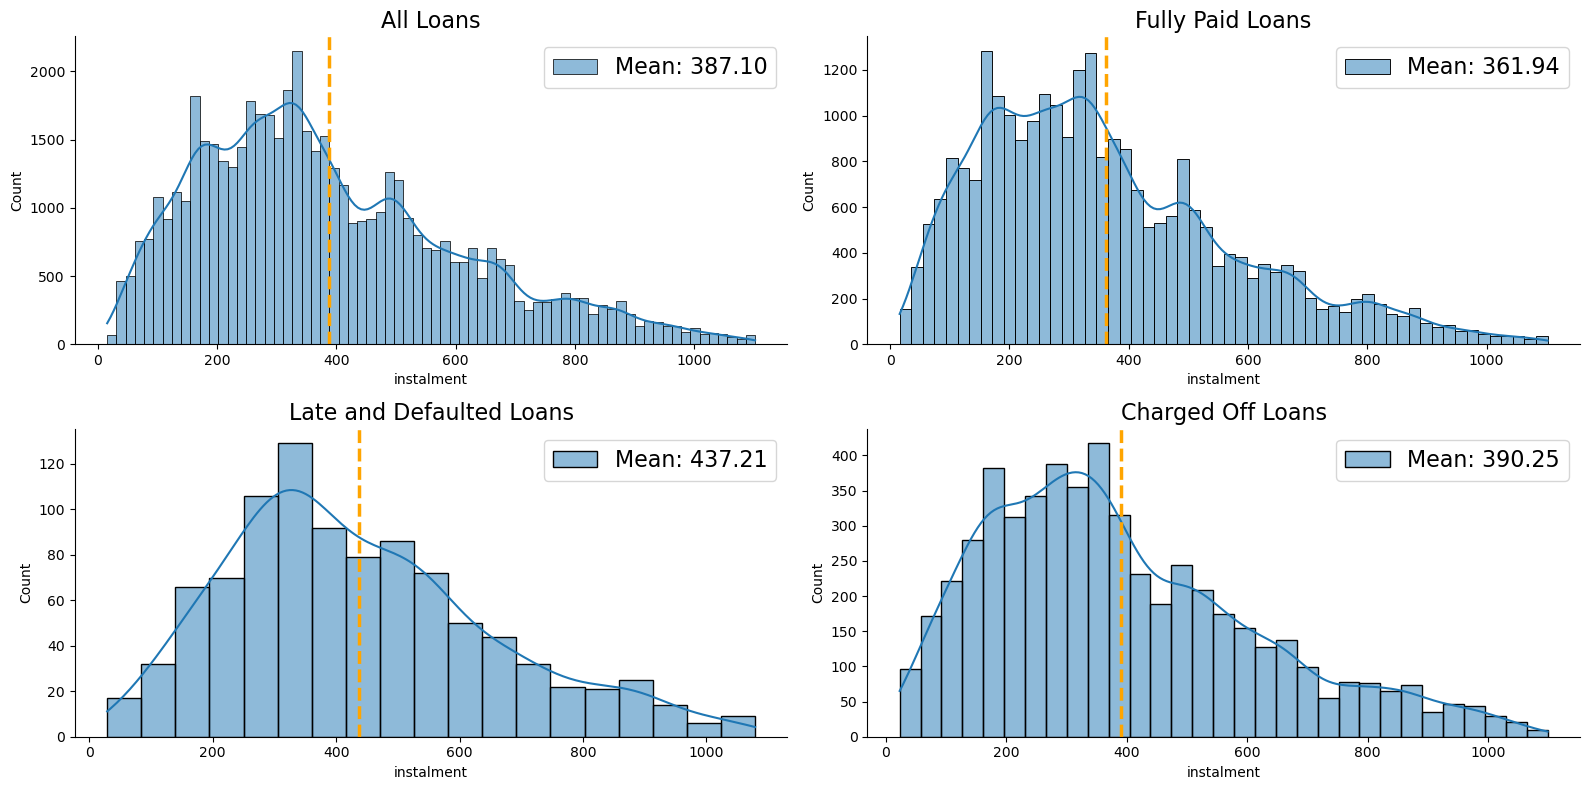

In [42]:
plotter.risk_identifier_numerical('instalment')

The monthly instalment is again significantly higher for late/defaulted loans compared to fully paid loans, at an 20% increase. However, charged off loan instalments were only 8% higher than fully paid loans. Nethertheless, both risky and charged off loans demonstrate higher mean monthly instalments and are highlighted as a possible indication for risk here.

---

### Debt-to-Income Ratio

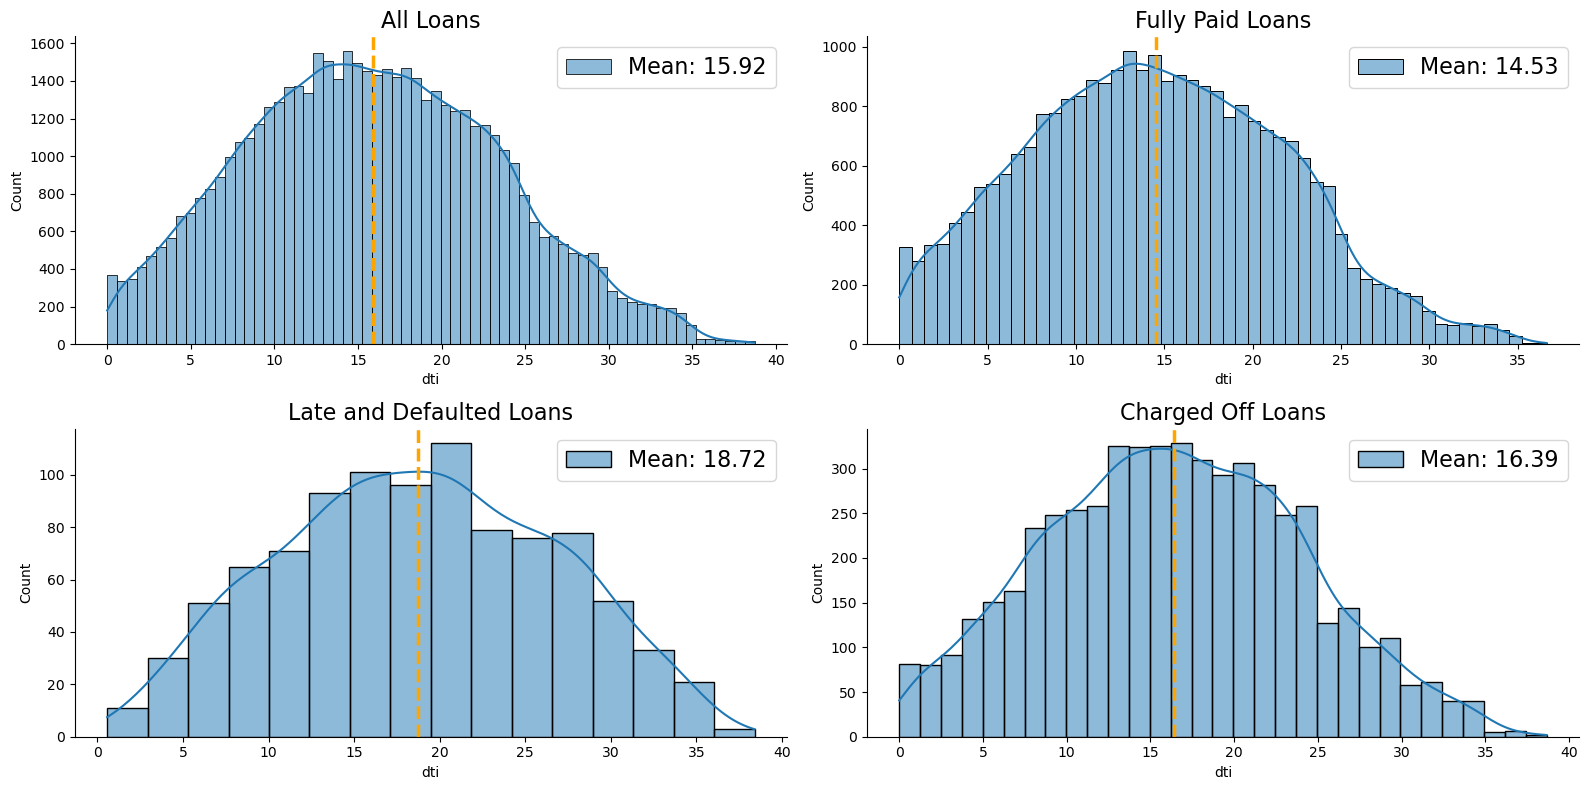

In [43]:
plotter.risk_identifier_numerical('dti')

Similarly, the mean dti is also higher for late/defaulted loans and charged off loans than fully paid loans, indicating it's use as an indicator for risk.

## Summary

#### Current status of loans

- Currently, the majority of loans have already been recovered, at 91% of the total funded amount for all loans. 

- The projected loan recovery over the next six months stands at £70 million, 5.8% of the total expected revenue including interest and 7.4% of the total funded amount. This is including all current open accounts.

- Charged off loans represent 10.2% of the total number of loans issued.

#### Projected Loss

- The projected loss from charged off loans would be is £67 million, representing 66.38% of the total expected revenue for charged off loans and 7.3% of the expected revenue for all loans.

#### Possible Loss

- Risky loans that are currently late on payments represent 4.7% of current open loans.

- The projected loss of these risky loans stands at £9 million, representing 47% of the expected revenue return of these risky loans and 2.37% of total expected return of all open accounts. 

- When combined with defaulted loans, a loss of almost £10 million is expected which represents 2.5% of the total expected revenue at the end of loan term. Therefore these loans represent a significant risk.

#### Indicators of Loss

- The strongest indicators of loss were loan grade, home ownership, loan amount, interest rate, monthly instalment and dti.

- Loans that are late/defaulted or charged off typically have lower loan grades, larger loan amounts, higher interest rates, higher monthly instalments and a higher debt-to-income ratio.

- Subtle correlations were observed between risky loans and annual income, with lower incomes for risky or charged off loans

Considering all of the above, it is clear care must be taken to monitor late and defaulted loans, as if charged off represent a 2.5% projected loss of total expected revenue including interest, which stands at almost £10 million. 